# Building a House Price Predictor API  
The client is interested in forecasting houses so the company can look to invest. Rather than using a registered valuer they're looking for something which can be done using the latest technology. Jamie has collected some data on existing house prices over the last few years and has asked to see what you can do. 

# 1. Import Data

In [1]:
!pip install pandas scikit-learn xgboost dill

You should consider upgrading via the 'D:\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd

In [2]:
# Load in data 
df = pd.read_csv('regressiondata.csv', index_col='ID')

In [3]:
# Displays the first five rows of data
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [4]:
# Show last five rows of data
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [5]:
# Get a specific row
df.iloc[9351]

TransactionDate        2019.07
HouseAge                  36.0
DistanceToStation    554.32482
NumberOfPubs               3.0
PostCode                5217.0
HousePrice              420246
Name: 9351, dtype: object

# 2. Split Data to Prevent Snooping Bias

In [6]:
# Import splitting function
from sklearn.model_selection import train_test_split

In [7]:
# Split data into training and testing 
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [8]:
# See the train parition
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# 3. Exploratory Data Analysis

## Bird's Eye View

In [9]:
train.iloc[0]['HousePrice']

'460286'

In [10]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [11]:
# Get Information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


In [12]:
# Create summary statistics
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [13]:
# Type cast incorrect datatypes to new datatypes
train['PostCode'] = train['PostCode'].astype(str)
train['TransactionDate'] = train['TransactionDate'].astype(str)
#train['HousePrice'] = train['HousePrice'].astype(float)

In [14]:
# Create summary statistics for non-numeric features
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


## Analyse Numerical Attributes

### Plot Distributions

In [16]:
# Install dependencies 
!pip install matplotlib seaborn

You should consider upgrading via the 'D:\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.


In [15]:
!pip show seaborn

Name: seaborn
Version: 0.12.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: d:\full stack machine learning\fullstack\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [15]:
# Import data viz libs 
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
# Show shape of data
train.shape

(6549, 6)

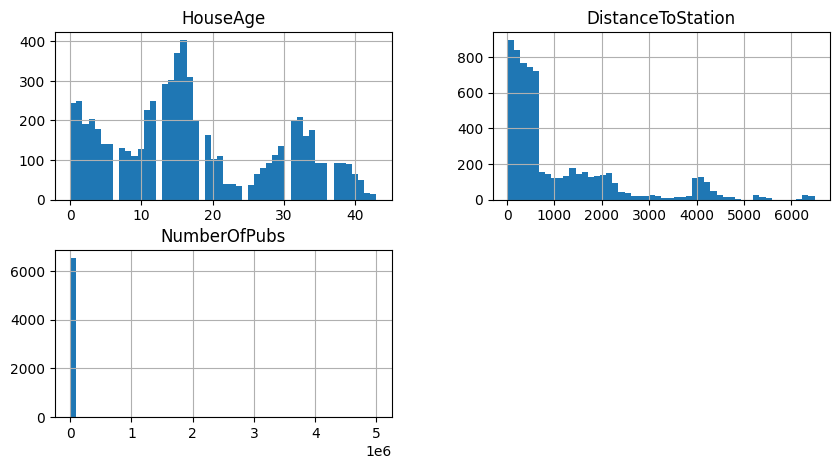

In [17]:
# Plot distributions
train.hist(figsize=(10,5), bins=50)
plt.show()

### Why isn't House Price Showing up as Numeric?

In [18]:
# str => float 
train['HousePrice'].astype(float)

ValueError: could not convert string to float: '??'

In [20]:
# Filter dataset based on HousePrice == '??'
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [21]:
# Drop rows that equal '??'
train = train[train['HousePrice'] !='??']

In [22]:
# Double check if the row has been dropped
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [23]:
# Overwrite the house price column with the converted column
train['HousePrice'] = train['HousePrice'].astype(float)

In [24]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

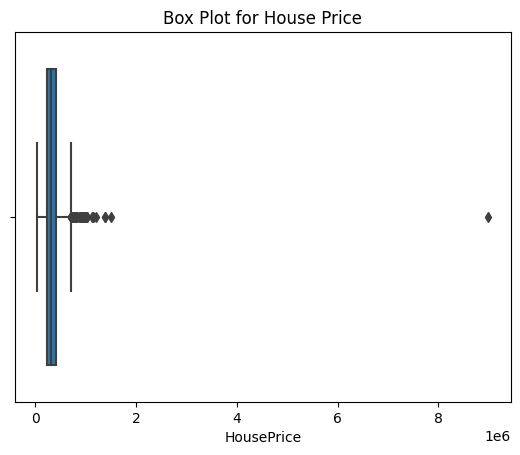

In [25]:
# Create a box plot for house prices
plt.title('Box Plot for House Price')
sns.boxplot(x=train['HousePrice'])
plt.show()

### Drop Outlier 

In [26]:
# Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [27]:
train = train.drop(8445)

In [28]:
# Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


### What's happening with pubs

In [29]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [30]:
train.drop(13, inplace=True)

In [31]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
3195,2020.11,32.0,324.371247,10.0,5614.0,488918.0
2996,2020.03,28.0,772.777219,10.0,5217.0,299235.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


## Analyse Categorical Variables

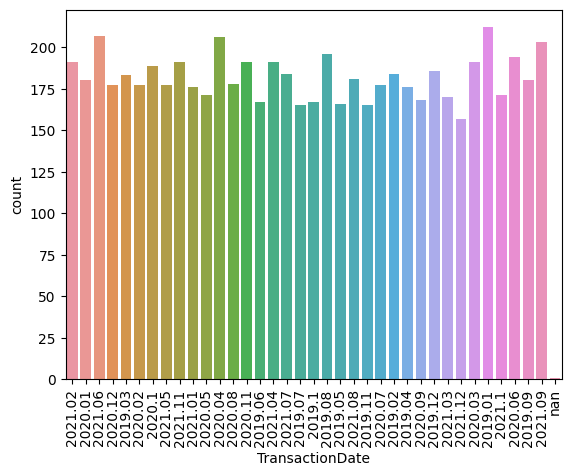

In [32]:
# Create a countplot for transaction date
plt.xticks(rotation=90)
sns.countplot(x='TransactionDate', data=train)
plt.show()

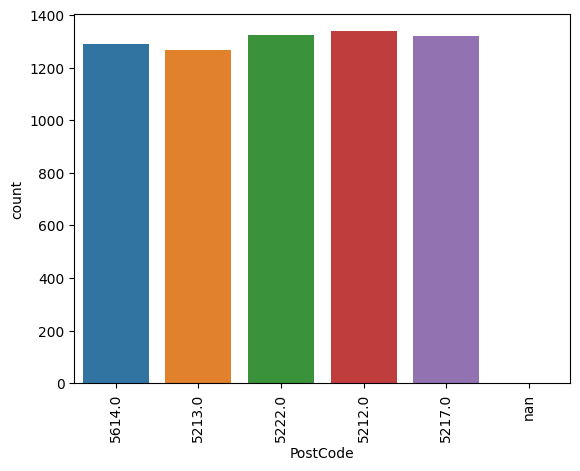

In [33]:
# Create a countplot for transaction date
plt.xticks(rotation=90)
sns.countplot(x=train['PostCode'])
plt.show()

## Analyse Relationships Numeric/Numeric

### Calculate Pearson's Correlation

In [34]:
# Calculate pearsons correlation
train.select_dtypes(exclude='object').corr()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
HouseAge,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.156693,-0.539859,0.452309,1.000000


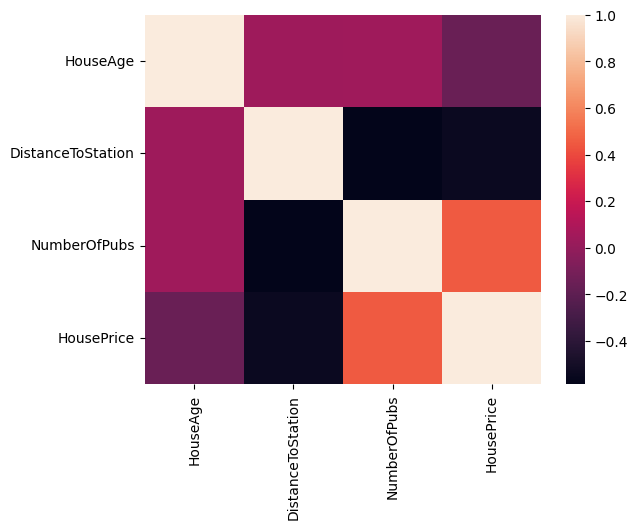

In [35]:
# Viz correlation using a heatmap
sns.heatmap(train.select_dtypes(exclude='object').corr()) 
plt.show()

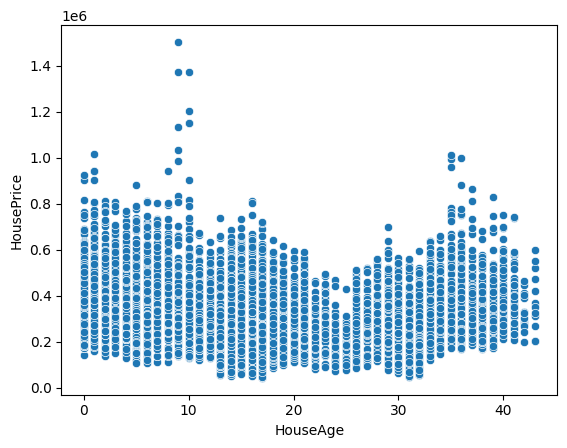

In [36]:
# Created a scatter plot
sns.scatterplot(x='HouseAge', y='HousePrice', data=train)
plt.show()

## Analyse Relationships Cat/Num

### Is Post Code Driving Value?

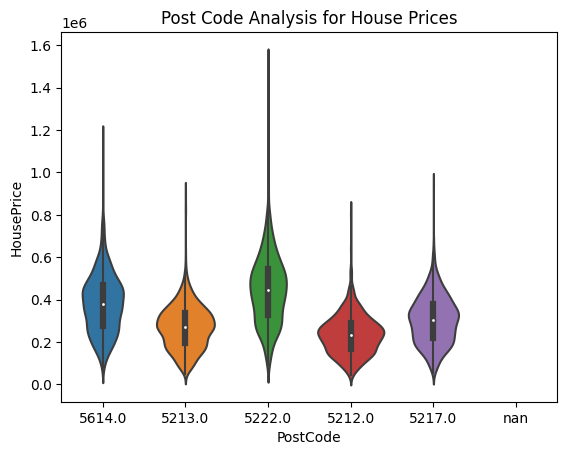

In [37]:
plt.title('Post Code Analysis for House Prices')
sns.violinplot(x='PostCode', y='HousePrice', data=train)
plt.show()

### What about the date it was sold?

In [38]:
# Check for nulls in a column
train[train['TransactionDate'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [39]:
# Check if a string exists in a column
train[train['TransactionDate']=='nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


In [40]:
# Drop missing house prices
train = train[~train['HousePrice'].isnull()]

In [41]:
int(train.iloc[0]['TransactionDate'][5:])

2

In [42]:
# Apply string transformation on Transaction Date
train['YearSold'] = train['TransactionDate'].apply(lambda x: x[:4]).astype(int)
train['MonthSold'] = train['TransactionDate'].apply(lambda x: x[5:]).astype(int)

In [43]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
YearSold               int32
MonthSold              int32
dtype: object

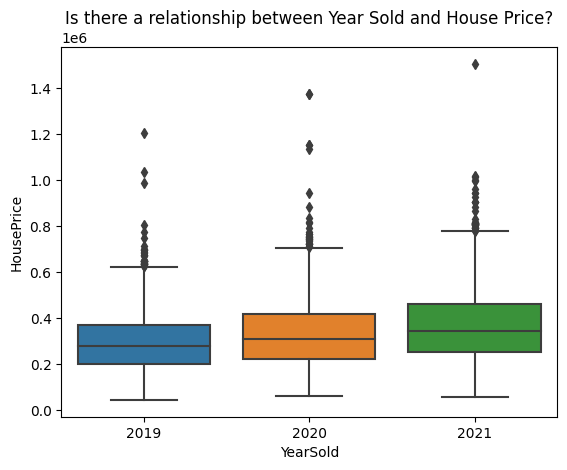

In [44]:
plt.title('Is there a relationship between Year Sold and House Price?')
sns.boxplot(x='YearSold', y='HousePrice', data=train)
plt.show()

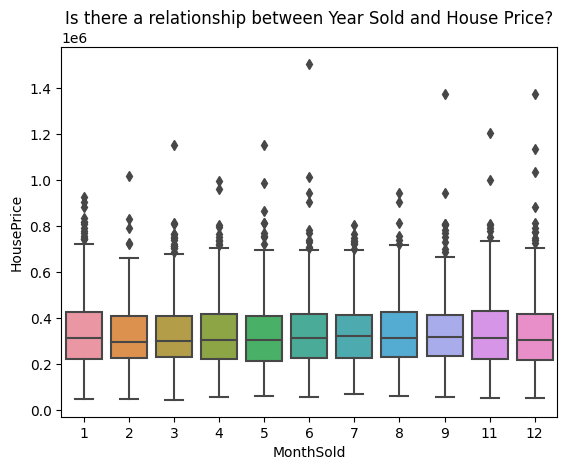

In [45]:
plt.title('Is there a relationship between Year Sold and House Price?')
sns.boxplot(x='MonthSold', y='HousePrice', data=train)
plt.show()

# 4. Data Preprocessing

## Build Preprocessing Function

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [47]:
# Using simple imputer
imputer = SimpleImputer()
imputer.fit(train[['HouseAge','DistanceToStation', 'NumberOfPubs']])
imputer.transform(train[train['HouseAge'].isnull()][['HouseAge','DistanceToStation', 'NumberOfPubs']])

array([[  17.37972167, 1091.84711209,    4.0735474 ],
       [  17.37972167, 1091.84711209,    4.        ]])

In [48]:
train[train['HouseAge'].isnull()][['HouseAge','DistanceToStation', 'NumberOfPubs']]
(16.0 - train['HouseAge'].mean()) / train['HouseAge'].std()

-0.12027904011738184

In [49]:
onehot = OneHotEncoder()
onehot.fit(train[['PostCode']])
onehot.transform(train[['PostCode']]).toarray()
onehot.get_feature_names_out()

array(['PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

In [50]:
class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    def fit(self, X, y=None): 
        
        # Create and fit simple imputer
        self.imputer = SimpleImputer()
        self.imputer.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        # Create and fit Standard Scaler 
        self.scaler = StandardScaler()
        self.scaler.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']]) 
        
        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[['PostCode']])
        
        return self 
        
        
    # Apply our custom preprocessors 
    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        onehot_cols = self.onehot.transform(X[['PostCode']])
        
        # Copy the df 
        transformed_df = X.copy()
        
        # Apply year and month transforms 
        transformed_df['Year'] = transformed_df['TransactionDate'].apply(lambda x: x[:4]).astype(int)
        transformed_df['Month'] = transformed_df['TransactionDate'].apply(lambda x: x[5:]).astype(int)
        transformed_df = transformed_df.drop('TransactionDate', axis=1)
        
        # Apply transformed columns
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = imputed_cols
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = self.scaler.transform(transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        # Drop existing Post Code column and replace with one hot equiv
        transformed_df = transformed_df.drop('PostCode', axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [51]:
preproc = Preprocessor()

In [52]:
preproc.fit(train)

Preprocessor()

## Preview Preprocessed Data

In [53]:
preprocessed_df = preproc.transform(train.drop(['YearSold', 'MonthSold'], axis=1))
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0


In [54]:
preprocessed_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float64
Year                   int32
Month                  int32
PostCode_5212.0        int32
PostCode_5213.0        int32
PostCode_5217.0        int32
PostCode_5222.0        int32
PostCode_5614.0        int32
dtype: object

In [55]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6541 entries, 8450 to 8915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   Year               6541 non-null   int32  
 5   Month              6541 non-null   int32  
 6   PostCode_5212.0    6541 non-null   int32  
 7   PostCode_5213.0    6541 non-null   int32  
 8   PostCode_5217.0    6541 non-null   int32  
 9   PostCode_5222.0    6541 non-null   int32  
 10  PostCode_5614.0    6541 non-null   int32  
dtypes: float64(4), int32(7)
memory usage: 434.4 KB


## Clean up Analysis Features

In [56]:
train = train.drop(['YearSold','MonthSold'], axis=1)

In [57]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


## Create X and y values

In [58]:
X_train = train.drop('HousePrice', axis=1) 
y_train = train['HousePrice'] 

# 5. Modelling

## Import ML Dependencies

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

## Create Pipelines

In [60]:
pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()), 
    'rf': make_pipeline(Preprocessor(), RandomForestRegressor()), 
    'gb': make_pipeline(Preprocessor(), GradientBoostingRegressor()), 
    'xg': make_pipeline(Preprocessor(), XGBRegressor()), 
}

In [61]:
pipelines['xg']

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

### Training Outside of a Pipeline

In [62]:
X_temp = preprocessed_df.drop('HousePrice', axis=1)
y_temp = preprocessed_df['HousePrice']

In [63]:
ridgemodel = Ridge()

In [64]:
ridgemodel.fit(X_temp, y_temp)

Ridge()

In [65]:
ridgemodel.predict(X_temp)

array([453158.70403589, 281048.56313422, 473919.1346858 , ...,
       305550.331     , 349468.7929066 , 301856.67576404])

## Create Tuning Grids

In [66]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': Fal

In [67]:
grid = {
    'ridge':{'ridge__alpha':[0.05, 0.25, 0.5, 1.0]}, 
    'rf':{
        'randomforestregressor__n_estimators':[100,200,300], 
        'randomforestregressor__max_depth':[5,6,7,None]
    },
    'gb':{
        'gradientboostingregressor__n_estimators':[100,200,300], 
        'gradientboostingregressor__max_depth':[5,6,7, None]
    },
    'xg':{
       'xgbregressor__n_estimators':[100,200,300], 
       'xgbregressor__max_depth':[5,6,7,None]
    }
}

## Train Models and Perform HPO

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
fit_models = {}
for algo, pipeline in pipelines.items(): 
    try: 
        print(algo)
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, y_train) 
        fit_models[algo] = model 
    except Exception as e: 
        print(f'Model {algo} had an error {e}')

ridge
rf
gb
xg


In [70]:
fit_models

{'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('ridge', Ridge())]),
              n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
              scoring='r2'),
 'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('randomforestregressor',
                                         RandomForestRegressor())]),
              n_jobs=-1,
              param_grid={'randomforestregressor__max_depth': [5, 6, 7, None],
                          'randomforestregressor__n_estimators': [100, 200,
                                                                  300]},
              scoring='r2'),
 'gb': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('gradientboostingregressor',
                                      

# 6. Evaluate Models

## Import Evaluation Metrics

In [71]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Preprocess Test Set For Predictions

### Look for Nulls

In [72]:
# Look for nulls in dataset
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [73]:
# Drop any nulls in the house price 
test = test[~test.HousePrice.isnull()]

In [74]:
# Double check nulls are removed
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

### Check datatypes

In [75]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [76]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [77]:
# Fix datatypes in test dataframe
test = test[test['HousePrice']!='??']
test['HousePrice'] = test.HousePrice.astype(float)
test['TransactionDate'] = test.TransactionDate.astype(str)
test['PostCode'] = test.PostCode.astype(str)

In [78]:
test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

### Create X_test and y_test 

In [79]:
X_test = test.drop('HousePrice', axis=1)
y_test = test['HousePrice']

In [80]:
X_test.shape

(2803, 5)

In [81]:
y_test.shape

(2803,)

## Calculate Regression Metrics

In [82]:
for algo, model in fit_models.items(): 
    yhat = model.predict(X_test)
    r2 = r2_score(y_test, yhat) 
    mae = mean_absolute_error(y_test, yhat)
    print(f'{algo}- R2 Score:{r2}, MAE Score:{mae}') 

ridge- R2 Score:0.6691443155811747, MAE Score:62578.08779739755
rf- R2 Score:0.8207335567146804, MAE Score:44481.67633131169
gb- R2 Score:0.8631517167859935, MAE Score:38672.32285504821
xg- R2 Score:0.853617617693814, MAE Score:39618.537530937836


## Make Predictions

In [83]:
model = fit_models['gb']

In [84]:
yhat = model.predict(X_test)

In [85]:
results_df = y_test.to_frame()
results_df['yhat'] = yhat 
results_df['delta'] = results_df.HousePrice.astype(float) - results_df.yhat

In [86]:
results_df.to_csv('results.csv')

## Explain model

### Calculate Feature Importance

In [87]:
ensemble = model.best_estimator_['gradientboostingregressor']

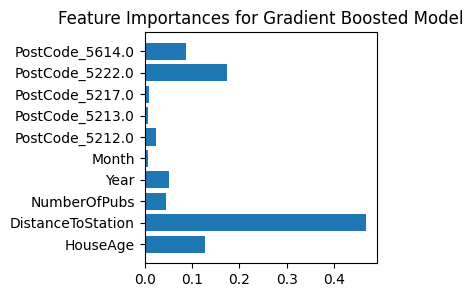

In [88]:
plt.figure(figsize=(3,3))
plt.title('Feature Importances for Gradient Boosted Model')
plt.barh(ensemble.feature_names_in_, ensemble.feature_importances_)
plt.show()

### Calculate Feature Importance for All Models

In [89]:
import numpy as np 

In [90]:
new_metric = np.square(fit_models['ridge'].best_estimator_[1].coef_) / np.sum(np.square(fit_models['ridge'].best_estimator_[1].coef_) )

In [91]:
np.sum(new_metric)

0.9999999999999999

In [92]:
feature_importances = {}
for algo, pipeline in fit_models.items(): 
    if algo == 'ridge': 
        coef_ = pipeline.best_estimator_[1].coef_
        feature_importances[algo] = np.square(coef_) / np.sum(np.square(coef_))
    else: 
        feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_

In [93]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13537874, 0.44611939, 0.05604866, 0.05088729, 0.03491869,
        0.00806432, 0.00268111, 0.01282251, 0.16658212, 0.08649718]),
 'gb': array([0.12724408, 0.46741786, 0.04547016, 0.0517743 , 0.00630246,
        0.0239321 , 0.00649621, 0.00964047, 0.17492049, 0.08680186]),
 'xg': array([0.03207528, 0.07127062, 0.02292063, 0.05411822, 0.00475283,
        0.09275293, 0.02268689, 0.04478648, 0.41193107, 0.24270506],
       dtype=float32)}

In [94]:
importance_df = pd.DataFrame(feature_importances, index=ensemble.feature_names_in_)
importance_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.135379,0.127244,0.032075
DistanceToStation,0.101874,0.446119,0.467418,0.071271
NumberOfPubs,0.031097,0.056049,0.045470,0.022921
Year,0.038686,0.050887,0.051774,0.054118
Month,0.000006,0.034919,0.006302,0.004753
PostCode_5212.0,0.225705,0.008064,0.023932,0.092753
PostCode_5213.0,0.094727,0.002681,0.006496,0.022687
PostCode_5217.0,0.016941,0.012823,0.009640,0.044786
PostCode_5222.0,0.392286,0.166582,0.174920,0.411931
PostCode_5614.0,0.082193,0.086497,0.086802,0.242705


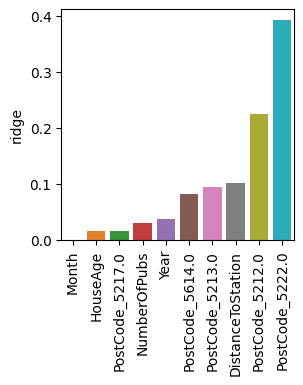

In [95]:
plt.figure(figsize=(3,3))
model_name = 'ridge'
sorted_imp = importance_df.sort_values(model_name)
sns.barplot(x = sorted_imp.index, y = model_name, data=sorted_imp)
plt.xticks(rotation=90)
plt.show()

### Plot Trees

In [100]:
!pip install graphviz

You should consider upgrading via the 'D:\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.


In [101]:
from sklearn.tree import plot_tree
import xgboost as xgb
from matplotlib.pylab import rcParams

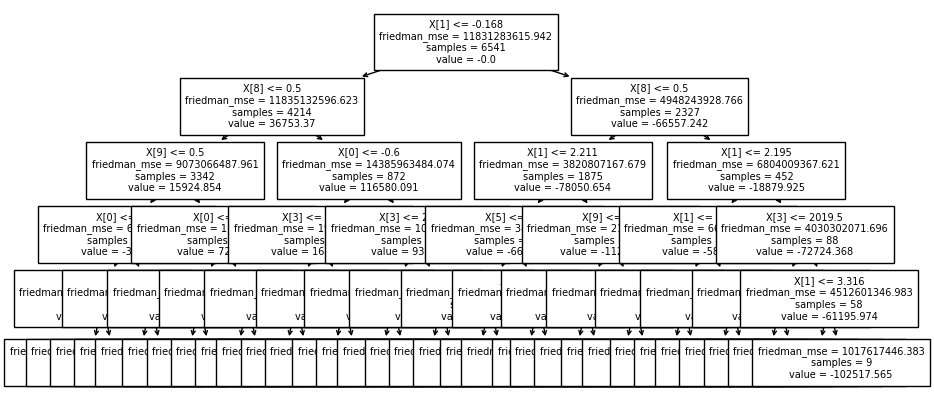

In [113]:
# Plot tree for gradient boosted model
plt.figure(figsize=(10,5))
plot_tree(ensemble.estimators_[5,0], fontsize=7)
plt.show()

In [110]:
ensemble.feature_names_in_[2]

'NumberOfPubs'

In [111]:
X_train.shape

(6541, 5)

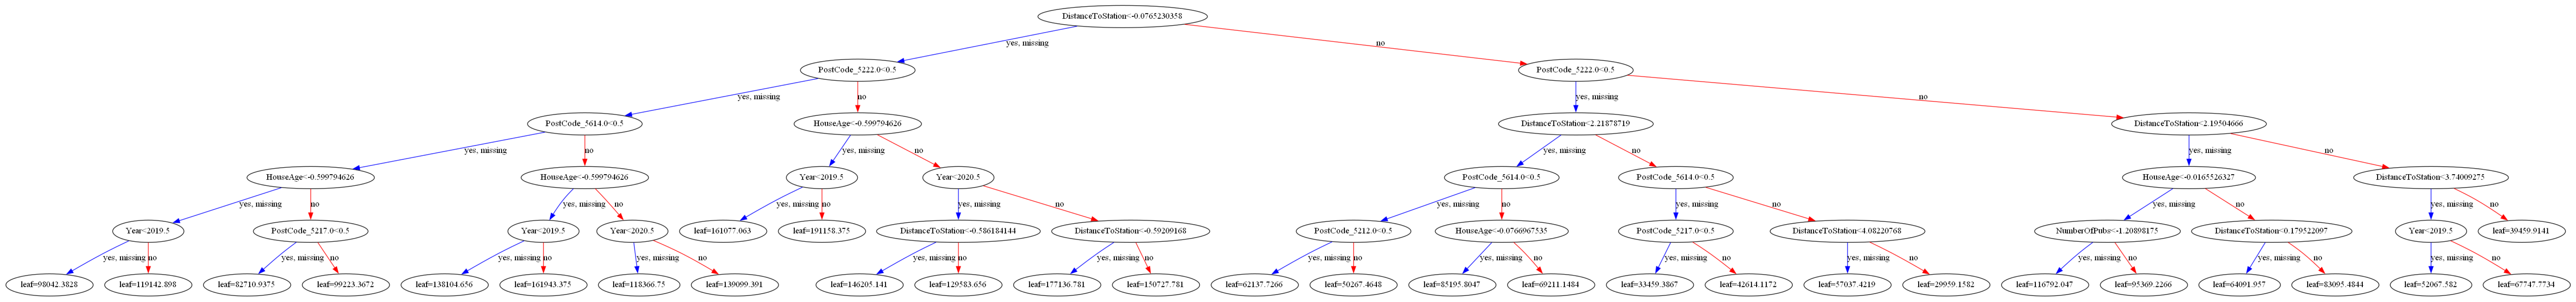

In [116]:
rcParams['figure.figsize'] = 100,100
xgb.plot_tree(fit_models['xg'].best_estimator_[1])
plt.show()    

# 7. Save model

In [117]:
import dill

In [118]:
model = fit_models['gb']

In [119]:
# Save model using dill 
with open('gb.pkl', 'wb') as f: 
    dill.dump(model, f)

In [120]:
with open('gb.pkl', 'rb') as f: 
    reloaded_model = dill.load(f)

In [124]:
reloaded_model.predict(X_test)

array([660072.29726806, 289177.79297644, 166619.49465334, ...,
       392935.05936691, 737461.9967578 , 391258.28649689])

In [126]:
X_test.loc[0].to_json()

'{"TransactionDate":"2020.12","HouseAge":17.0,"DistanceToStation":467.6447748,"NumberOfPubs":4.0,"PostCode":"5222.0"}'